# importing tara data and exploring gamma

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as crs


In [4]:
# col_names = 'date,time,lat,lon,Wt,sal,cp406,cp410.1,cp414.4,cp418.7,cp423.8,cp428.5,cp432.9,cp437,cp441.4,cp446.2,cp451.3,cp455.9,cp460.6,cp465.2,cp469.9,cp474.8,cp479.7,cp484.6,cp489,cp493.9,cp498.4,cp503.5,cp508.3,cp513,cp518,cp523,cp527.3,cp532.2,cp536.5,cp541.3,cp545.7,cp550,cp554.8,cp559.3,cp563.7,cp567.8,cp571.9,cp575.4,cp579.5,cp583.7,cp587.8,cp592.2,cp596.7,cp600.9,cp605.5,cp609.8,cp614.5,cp619,cp623.2,cp627.7,cp632,cp636.3,cp640.7,cp645,cp649.4,cp653.7,cp658,cp662.4,cp666.5,cp670.8,cp675,cp679.1,cp683.3,cp687.1,cp691,cp694.5,cp698.4,cp702.1,cp705.7,cp709.1,cp712.4,cp715.8,cp719,cp722.5,cp725.3,cp728.4,cp731.3,cp734.3,cp736.7,cp739.6,cp741.9,cp744.3,cp746.4,cp748.4,cp750,cp406_sd,cp410.1_sd,cp414.4_sd,cp418.7_sd,cp423.8_sd,cp428.5_sd,cp432.9_sd,cp437_sd,cp441.4_sd,cp446.2_sd,cp451.3_sd,cp455.9_sd,cp460.6_sd,cp465.2_sd,cp469.9_sd,cp474.8_sd,cp479.7_sd,cp484.6_sd,cp489_sd,cp493.9_sd,cp498.4_sd,cp503.5_sd,cp508.3_sd,cp513_sd,cp518_sd,cp523_sd,cp527.3_sd,cp532.2_sd,cp536.5_sd,cp541.3_sd,cp545.7_sd,cp550_sd,cp554.8_sd,cp559.3_sd,cp563.7_sd,cp567.8_sd,cp571.9_sd,cp575.4_sd,cp579.5_sd,cp583.7_sd,cp587.8_sd,cp592.2_sd,cp596.7_sd,cp600.9_sd,cp605.5_sd,cp609.8_sd,cp614.5_sd,cp619_sd,cp623.2_sd,cp627.7_sd,cp632_sd,cp636.3_sd,cp640.7_sd,cp645_sd,cp649.4_sd,cp653.7_sd,cp658_sd,cp662.4_sd,cp666.5_sd,cp670.8_sd,cp675_sd,cp679.1_sd,cp683.3_sd,cp687.1_sd,cp691_sd,cp694.5_sd,cp698.4_sd,cp702.1_sd,cp705.7_sd,cp709.1_sd,cp712.4_sd,cp715.8_sd,cp719_sd,cp722.5_sd,cp725.3_sd,cp728.4_sd,cp731.3_sd,cp734.3_sd,cp736.7_sd,cp739.6_sd,cp741.9_sd,cp744.3_sd,cp746.4_sd,cp748.4_sd,cp750_sd'

# col_names = 'date,time,lat,lon,Wt,sal,ap400.3,ap405,ap409.1,ap413.4,ap417.8,ap422.8,ap427.7,ap432.2,ap436.4,ap441.2,ap446.2,ap451.5,ap456.6,ap461.1,ap465.9,ap471,ap476.6,ap481.7,ap486.6,ap491.3,ap496,ap500.7,ap505.7,ap511.1,ap516.5,ap521.8,ap526.5,ap531.3,ap536,ap540.8,ap545.6,ap550.9,ap555.8,ap560.8,ap565.6,ap570.3,ap574.6,ap579,ap582.4,ap586.6,ap591,ap595.4,ap600.3,ap604.6,ap609.5,ap614.2,ap619,ap623.5,ap627.9,ap632.4,ap636.7,ap641.3,ap645.8,ap650.4,ap655,ap659.8,ap664.2,ap668.8,ap673.2,ap677.5,ap681.5,ap685.6,ap689.7,ap693.6,ap697.4,ap701.2,ap704.7,ap708.4,ap712.1,ap715.6,ap719.2,ap722.7,ap726,ap729.2,ap732.4,ap735.6,ap738.6,ap400.3_sd,ap405_sd,ap409.1_sd,ap413.4_sd,ap417.8_sd,ap422.8_sd,ap427.7_sd,ap432.2_sd,ap436.4_sd,ap441.2_sd,ap446.2_sd,ap451.5_sd,ap456.6_sd,ap461.1_sd,ap465.9_sd,ap471_sd,ap476.6_sd,ap481.7_sd,ap486.6_sd,ap491.3_sd,ap496_sd,ap500.7_sd,ap505.7_sd,ap511.1_sd,ap516.5_sd,ap521.8_sd,ap526.5_sd,ap531.3_sd,ap536_sd,ap540.8_sd,ap545.6_sd,ap550.9_sd,ap555.8_sd,ap560.8_sd,ap565.6_sd,ap570.3_sd,ap574.6_sd,ap579_sd,ap582.4_sd,ap586.6_sd,ap591_sd,ap595.4_sd,ap600.3_sd,ap604.6_sd,ap609.5_sd,ap614.2_sd,ap619_sd,ap623.5_sd,ap627.9_sd,ap632.4_sd,ap636.7_sd,ap641.3_sd,ap645.8_sd,ap650.4_sd,ap655_sd,ap659.8_sd,ap664.2_sd,ap668.8_sd,ap673.2_sd,ap677.5_sd,ap681.5_sd,ap685.6_sd,ap689.7_sd,ap693.6_sd,ap697.4_sd,ap701.2_sd,ap704.7_sd,ap708.4_sd,ap712.1_sd,ap715.6_sd,ap719.2_sd,ap722.7_sd,ap726_sd,ap729.2_sd,ap732.4_sd,ap735.6_sd,ap738.6_sd,cp400.3,cp405,cp409.1,cp413.4,cp417.8,cp422.8,cp427.7,cp432.2,cp436.4,cp441.2,cp446.2,cp451.5,cp456.6,cp461.1,cp465.9,cp471,cp476.6,cp481.7,cp486.6,cp491.3,cp496,cp500.7,cp505.7,cp511.1,cp516.5,cp521.8,cp526.5,cp531.3,cp536,cp540.8,cp545.6,cp550.9,cp555.8,cp560.8,cp565.6,cp570.3,cp574.6,cp579,cp582.4,cp586.6,cp591,cp595.4,cp600.3,cp604.6,cp609.5,cp614.2,cp619,cp623.5,cp627.9,cp632.4,cp636.7,cp641.3,cp645.8,cp650.4,cp655,cp659.8,cp664.2,cp668.8,cp673.2,cp677.5,cp681.5,cp685.6,cp689.7,cp693.6,cp697.4,cp701.2,cp704.7,cp708.4,cp712.1,cp715.6,cp719.2,cp722.7,cp726,cp729.2,cp732.4,cp735.6,cp738.6,cp400.3_sd,cp405_sd,cp409.1_sd,cp413.4_sd,cp417.8_sd,cp422.8_sd,cp427.7_sd,cp432.2_sd,cp436.4_sd,cp441.2_sd,cp446.2_sd,cp451.5_sd,cp456.6_sd,cp461.1_sd,cp465.9_sd,cp471_sd,cp476.6_sd,cp481.7_sd,cp486.6_sd,cp491.3_sd,cp496_sd,cp500.7_sd,cp505.7_sd,cp511.1_sd,cp516.5_sd,cp521.8_sd,cp526.5_sd,cp531.3_sd,cp536_sd,cp540.8_sd,cp545.6_sd,cp550.9_sd,cp555.8_sd,cp560.8_sd,cp565.6_sd,cp570.3_sd,cp574.6_sd,cp579_sd,cp582.4_sd,cp586.6_sd,cp591_sd,cp595.4_sd,cp600.3_sd,cp604.6_sd,cp609.5_sd,cp614.2_sd,cp619_sd,cp623.5_sd,cp627.9_sd,cp632.4_sd,cp636.7_sd,cp641.3_sd,cp645.8_sd,cp650.4_sd,cp655_sd,cp659.8_sd,cp664.2_sd,cp668.8_sd,cp673.2_sd,cp677.5_sd,cp681.5_sd,cp685.6_sd,cp689.7_sd,cp693.6_sd,cp697.4_sd,cp701.2_sd,cp704.7_sd,cp708.4_sd,cp712.1_sd,cp715.6_sd,cp719.2_sd,cp722.7_sd,cp726_sd,cp729.2_sd,cp732.4_sd,cp735.6_sd,cp738.6_sd,bincount'

col_names = 'date,time,lat,lon,Wt,sal,Chl_lineheight,POC_cp,cp_gamma'

In [5]:
# wavelengths = 'ap400.3,ap405,ap409.1,ap413.4,ap417.8,ap422.8,ap427.7,ap432.2,ap436.4,ap441.2,ap446.2,ap451.5,ap456.6,ap461.1,ap465.9,ap471,ap476.6,ap481.7,ap486.6,ap491.3,ap496,ap500.7,ap505.7,ap511.1,ap516.5,ap521.8,ap526.5,ap531.3,ap536,ap540.8,ap545.6,ap550.9,ap555.8,ap560.8,ap565.6,ap570.3,ap574.6,ap579,ap582.4,ap586.6,ap591,ap595.4,ap600.3,ap604.6,ap609.5,ap614.2,ap619,ap623.5,ap627.9,ap632.4,ap636.7,ap641.3,ap645.8,ap650.4,ap655,ap659.8,ap664.2,ap668.8,ap673.2,ap677.5,ap681.5,ap685.6,ap689.7,ap693.6,ap697.4,ap701.2,ap704.7,ap708.4,ap712.1,ap715.6,ap719.2,ap722.7,ap726,ap729.2,ap732.4,ap735.6,ap738.6'
wavelengths = 'cp400.3,cp405,cp409.1,cp413.4,cp417.8,cp422.8,cp427.7,cp432.2,cp436.4,cp441.2,cp446.2,cp451.5,cp456.6,cp461.1,cp465.9,cp471,cp476.6,cp481.7,cp486.6,cp491.3,cp496,cp500.7,cp505.7,cp511.1,cp516.5,cp521.8,cp526.5,cp531.3,cp536,cp540.8,cp545.6,cp550.9,cp555.8,cp560.8,cp565.6,cp570.3,cp574.6,cp579,cp582.4,cp586.6,cp591,cp595.4,cp600.3,cp604.6,cp609.5,cp614.2,cp619,cp623.5,cp627.9,cp632.4,cp636.7,cp641.3,cp645.8,cp650.4,cp655,cp659.8,cp664.2,cp668.8,cp673.2,cp677.5,cp681.5,cp685.6,cp689.7,cp693.6,cp697.4,cp701.2,cp704.7,cp708.4,cp712.1,cp715.6,cp719.2,cp722.7,cp726,cp729.2,cp732.4,cp735.6,cp738.6'

wavelengths_names = wavelengths.split(',')
wavelengths = wavelengths.replace('cp','').split(',')
wavelengths = [float(x) for x in wavelengths]

In [6]:
wavelengths = np.array(wavelengths)

In [7]:
col_names = col_names.split(',')

In [8]:
col_names = 'date,time,lat,lon,Wt,sal,ap400.3,ap405,ap409.1,ap413.4,ap417.8,ap422.8,ap427.7,ap432.2,ap436.4,ap441.2,ap446.2,ap451.5,ap456.6,ap461.1,ap465.9,ap471,ap476.6,ap481.7,ap486.6,ap491.3,ap496,ap500.7,ap505.7,ap511.1,ap516.5,ap521.8,ap526.5,ap531.3,ap536,ap540.8,ap545.6,ap550.9,ap555.8,ap560.8,ap565.6,ap570.3,ap574.6,ap579,ap582.4,ap586.6,ap591,ap595.4,ap600.3,ap604.6,ap609.5,ap614.2,ap619,ap623.5,ap627.9,ap632.4,ap636.7,ap641.3,ap645.8,ap650.4,ap655,ap659.8,ap664.2,ap668.8,ap673.2,ap677.5,ap681.5,ap685.6,ap689.7,ap693.6,ap697.4,ap701.2,ap704.7,ap708.4,ap712.1,ap715.6,ap719.2,ap722.7,ap726,ap729.2,ap732.4,ap735.6,ap738.6,ap400.3_sd,ap405_sd,ap409.1_sd,ap413.4_sd,ap417.8_sd,ap422.8_sd,ap427.7_sd,ap432.2_sd,ap436.4_sd,ap441.2_sd,ap446.2_sd,ap451.5_sd,ap456.6_sd,ap461.1_sd,ap465.9_sd,ap471_sd,ap476.6_sd,ap481.7_sd,ap486.6_sd,ap491.3_sd,ap496_sd,ap500.7_sd,ap505.7_sd,ap511.1_sd,ap516.5_sd,ap521.8_sd,ap526.5_sd,ap531.3_sd,ap536_sd,ap540.8_sd,ap545.6_sd,ap550.9_sd,ap555.8_sd,ap560.8_sd,ap565.6_sd,ap570.3_sd,ap574.6_sd,ap579_sd,ap582.4_sd,ap586.6_sd,ap591_sd,ap595.4_sd,ap600.3_sd,ap604.6_sd,ap609.5_sd,ap614.2_sd,ap619_sd,ap623.5_sd,ap627.9_sd,ap632.4_sd,ap636.7_sd,ap641.3_sd,ap645.8_sd,ap650.4_sd,ap655_sd,ap659.8_sd,ap664.2_sd,ap668.8_sd,ap673.2_sd,ap677.5_sd,ap681.5_sd,ap685.6_sd,ap689.7_sd,ap693.6_sd,ap697.4_sd,ap701.2_sd,ap704.7_sd,ap708.4_sd,ap712.1_sd,ap715.6_sd,ap719.2_sd,ap722.7_sd,ap726_sd,ap729.2_sd,ap732.4_sd,ap735.6_sd,ap738.6_sd,cp400.3,cp405,cp409.1,cp413.4,cp417.8,cp422.8,cp427.7,cp432.2,cp436.4,cp441.2,cp446.2,cp451.5,cp456.6,cp461.1,cp465.9,cp471,cp476.6,cp481.7,cp486.6,cp491.3,cp496,cp500.7,cp505.7,cp511.1,cp516.5,cp521.8,cp526.5,cp531.3,cp536,cp540.8,cp545.6,cp550.9,cp555.8,cp560.8,cp565.6,cp570.3,cp574.6,cp579,cp582.4,cp586.6,cp591,cp595.4,cp600.3,cp604.6,cp609.5,cp614.2,cp619,cp623.5,cp627.9,cp632.4,cp636.7,cp641.3,cp645.8,cp650.4,cp655,cp659.8,cp664.2,cp668.8,cp673.2,cp677.5,cp681.5,cp685.6,cp689.7,cp693.6,cp697.4,cp701.2,cp704.7,cp708.4,cp712.1,cp715.6,cp719.2,cp722.7,cp726,cp729.2,cp732.4,cp735.6,cp738.6,cp400.3_sd,cp405_sd,cp409.1_sd,cp413.4_sd,cp417.8_sd,cp422.8_sd,cp427.7_sd,cp432.2_sd,cp436.4_sd,cp441.2_sd,cp446.2_sd,cp451.5_sd,cp456.6_sd,cp461.1_sd,cp465.9_sd,cp471_sd,cp476.6_sd,cp481.7_sd,cp486.6_sd,cp491.3_sd,cp496_sd,cp500.7_sd,cp505.7_sd,cp511.1_sd,cp516.5_sd,cp521.8_sd,cp526.5_sd,cp531.3_sd,cp536_sd,cp540.8_sd,cp545.6_sd,cp550.9_sd,cp555.8_sd,cp560.8_sd,cp565.6_sd,cp570.3_sd,cp574.6_sd,cp579_sd,cp582.4_sd,cp586.6_sd,cp591_sd,cp595.4_sd,cp600.3_sd,cp604.6_sd,cp609.5_sd,cp614.2_sd,cp619_sd,cp623.5_sd,cp627.9_sd,cp632.4_sd,cp636.7_sd,cp641.3_sd,cp645.8_sd,cp650.4_sd,cp655_sd,cp659.8_sd,cp664.2_sd,cp668.8_sd,cp673.2_sd,cp677.5_sd,cp681.5_sd,cp685.6_sd,cp689.7_sd,cp693.6_sd,cp697.4_sd,cp701.2_sd,cp704.7_sd,cp708.4_sd,cp712.1_sd,cp715.6_sd,cp719.2_sd,cp722.7_sd,cp726_sd,cp729.2_sd,cp732.4_sd,cp735.6_sd,cp738.6_sd,bincount'.split(',')
df_cp = pd.read_csv('data/94a71c2f93_NAAMES1_InLine_ACS.sb', skiprows=29, names=col_names)

In [9]:
col_names = 'date,time,lat,lon,Wt,sal,Chl_lineheight,POC_cp,cp_gamma'.split(',')
df = pd.read_csv('data/94a71c2f93_NAAMES1_InLine_ACS_Products.sb', skiprows=33, names=col_names)

In [10]:
df.iloc[193-33]

date              20151106
time              20:20:00
lat                 40.442
lon               -69.9811
Wt                 15.2501
sal                33.3052
Chl_lineheight      2.7806
POC_cp              260.32
cp_gamma              0.49
Name: 160, dtype: object

In [11]:
df_cp.iloc[9]

date          20151106
time          20:20:00
lat             40.442
lon           -69.9811
Wt             15.2501
                ...   
cp729.2_sd      0.0118
cp732.4_sd      0.0118
cp735.6_sd      0.0118
cp738.6_sd      0.0117
bincount           239
Name: 9, Length: 315, dtype: object

In [12]:
cp = df_cp.iloc[9][wavelengths_names]

In [13]:
gamma = df.iloc[193-33]['cp_gamma']

In [14]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [15]:
min(df.cp_gamma), max(df.cp_gamma)

(-6.84, 6.57)

<AxesSubplot:>

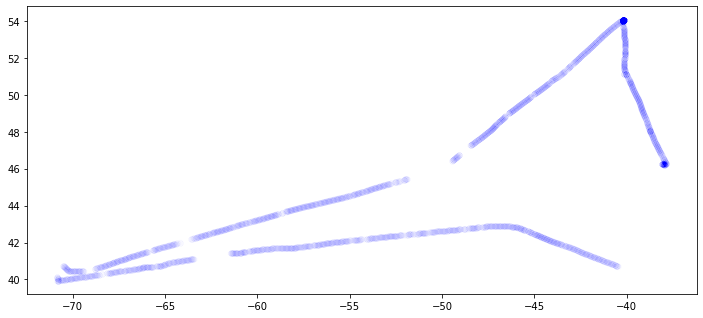

In [17]:
fig,ax = plt.subplots(figsize=(12,8))

gdf.plot(color='blue',alpha=.005,ax=ax)

<GeoAxesSubplot:>

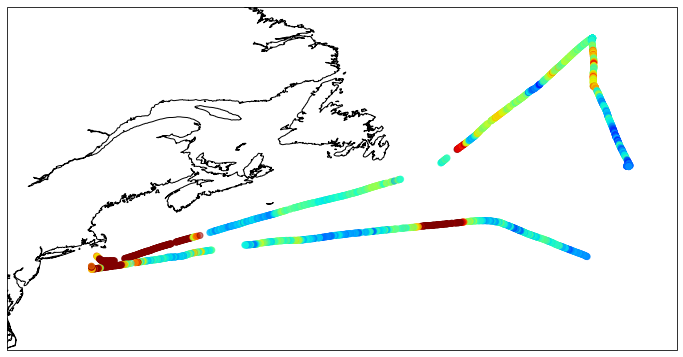

In [18]:
fig, ax = plt.subplots(figsize=(12,9), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
ax.set_ylim(35,56)
ax.set_xlim(-76,-35)

gdf.plot('Chl_lineheight',vmin=0,vmax=1,cmap='jet',alpha=.1,ax=ax)

<GeoAxesSubplot:>

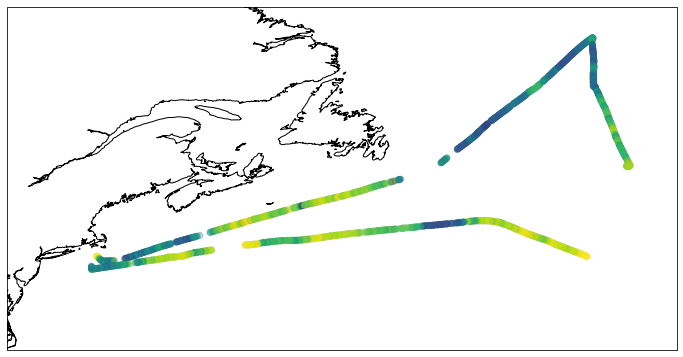

In [306]:
fig, ax = plt.subplots(figsize=(12,9), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
ax.set_ylim(35,56)
ax.set_xlim(-76,-35)

gdf.plot('cp_gamma',vmin=0,vmax=1,cmap='viridis',alpha=.05,ax=ax)

In [19]:
def least_square(x0, spec, wavelength):
    y = sum(((spec - x0[0] * (532 / wavelength) ** x0[1])) ** 2)
    return(y)

from scipy import optimize
xopt = optimize.fmin(least_square, np.array([.1, -0.8]), args=(cp.values, wavelengths), maxfun=2000, maxiter=4000,xtol=0.0000001,ftol=0.000001)

Optimization terminated successfully.
         Current function value: 0.007316
         Iterations: 71
         Function evaluations: 139


In [21]:
gamma_list = []
for i in range(len(df_cp)):
    cp_spec = df_cp.iloc[i][wavelengths_names]
    xopt = optimize.fmin(least_square, np.array([.1, -0.8]), args=(cp_spec, wavelengths), disp=0, maxfun=2000, maxiter=4000,xtol=0.0000001,ftol=0.000001)
    gamma_list.append(xopt[1])

In [245]:
len(gamma_list)

15189

In [ ]:
plt.hist(gdf['calc_gamma'],bins=30)
plt.hist(df.cp_gamma, bins=300,alpha=0.3)
plt.xlim(0,2)
plt.show()

In [246]:
len(gdf)

14239

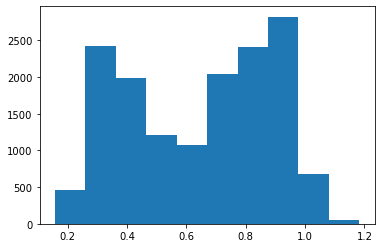

In [250]:
plt.hist(gdf['calc_gamma'])
plt.show()

In [248]:
gdf['calc_gamma'] = gamma_list

- we now have an easy method for gamma
- can briefly compare to S and T and chla and Wt
- could 
- can pull in S3 data and compare to larger spatial patterns and 

- grab all the Tara cruises and merge them and see the spatial extent
- if it is decent then maybe calculate gamma and compare to some S3 and altimetry and see the time range and number of GS crossings

(0.0, 1.3)

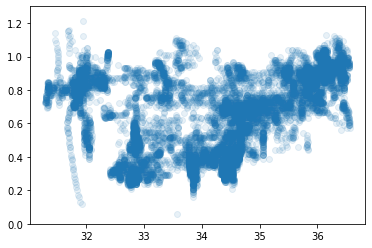

In [296]:
plt.scatter(df.sal,df.cp_gamma,alpha=0.1)
plt.ylim(0,1.3)

(0.0, 28.0)

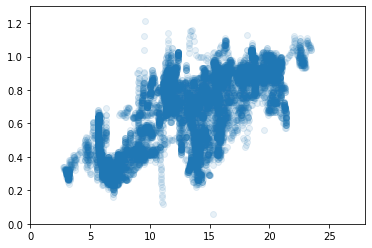

In [295]:
plt.scatter(df.Wt,df.cp_gamma,alpha=0.1)
plt.ylim(0,1.3)
plt.xlim(0,28)

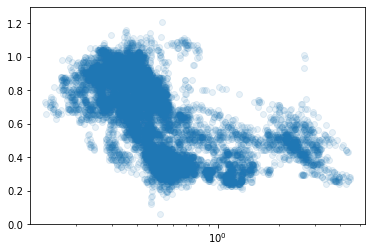

In [294]:
plt.scatter(df.Chl_lineheight,df.cp_gamma,alpha=0.1)
plt.ylim(0,1.3)
# plt.xlim(0.1,5)
plt.xscale('log')

(0.0, 25.0)

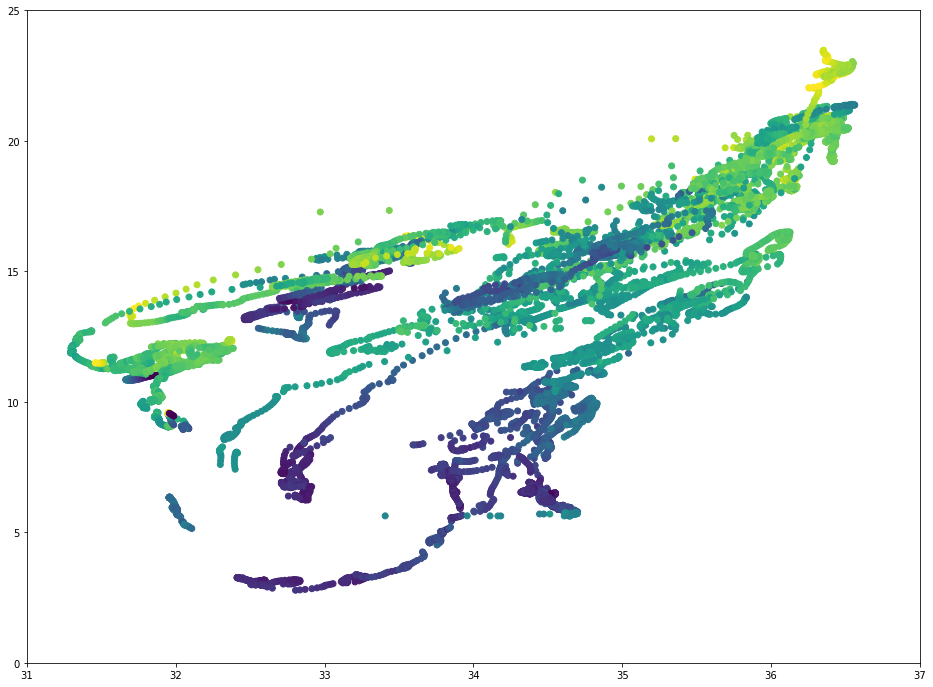

In [22]:
fig,ax = plt.subplots(figsize=(16,12))
plt.scatter(df.sal,df.Wt,c=df.cp_gamma,vmin=.2,vmax=1.1)
plt.xlim(31,37)
plt.ylim(0,25)


### grab and merge all the Tara Gulf Stream files

In [28]:
import glob
fns = glob.glob('data/Tara*')

In [29]:
col_names = 'date,time,lat,lon,Wt,sal,cp406,cp410.1,cp414.4,cp418.7,cp423.8,cp428.5,cp432.9,cp437,cp441.4,cp446.2,cp451.3,cp455.9,cp460.6,cp465.2,cp469.9,cp474.8,cp479.7,cp484.6,cp489,cp493.9,cp498.4,cp503.5,cp508.3,cp513,cp518,cp523,cp527.3,cp532.2,cp536.5,cp541.3,cp545.7,cp550,cp554.8,cp559.3,cp563.7,cp567.8,cp571.9,cp575.4,cp579.5,cp583.7,cp587.8,cp592.2,cp596.7,cp600.9,cp605.5,cp609.8,cp614.5,cp619,cp623.2,cp627.7,cp632,cp636.3,cp640.7,cp645,cp649.4,cp653.7,cp658,cp662.4,cp666.5,cp670.8,cp675,cp679.1,cp683.3,cp687.1,cp691,cp694.5,cp698.4,cp702.1,cp705.7,cp709.1,cp712.4,cp715.8,cp719,cp722.5,cp725.3,cp728.4,cp731.3,cp734.3,cp736.7,cp739.6,cp741.9,cp744.3,cp746.4,cp748.4,cp750,cp406_sd,cp410.1_sd,cp414.4_sd,cp418.7_sd,cp423.8_sd,cp428.5_sd,cp432.9_sd,cp437_sd,cp441.4_sd,cp446.2_sd,cp451.3_sd,cp455.9_sd,cp460.6_sd,cp465.2_sd,cp469.9_sd,cp474.8_sd,cp479.7_sd,cp484.6_sd,cp489_sd,cp493.9_sd,cp498.4_sd,cp503.5_sd,cp508.3_sd,cp513_sd,cp518_sd,cp523_sd,cp527.3_sd,cp532.2_sd,cp536.5_sd,cp541.3_sd,cp545.7_sd,cp550_sd,cp554.8_sd,cp559.3_sd,cp563.7_sd,cp567.8_sd,cp571.9_sd,cp575.4_sd,cp579.5_sd,cp583.7_sd,cp587.8_sd,cp592.2_sd,cp596.7_sd,cp600.9_sd,cp605.5_sd,cp609.8_sd,cp614.5_sd,cp619_sd,cp623.2_sd,cp627.7_sd,cp632_sd,cp636.3_sd,cp640.7_sd,cp645_sd,cp649.4_sd,cp653.7_sd,cp658_sd,cp662.4_sd,cp666.5_sd,cp670.8_sd,cp675_sd,cp679.1_sd,cp683.3_sd,cp687.1_sd,cp691_sd,cp694.5_sd,cp698.4_sd,cp702.1_sd,cp705.7_sd,cp709.1_sd,cp712.4_sd,cp715.8_sd,cp719_sd,cp722.5_sd,cp725.3_sd,cp728.4_sd,cp731.3_sd,cp734.3_sd,cp736.7_sd,cp739.6_sd,cp741.9_sd,cp744.3_sd,cp746.4_sd,cp748.4_sd,cp750_sd'.split(',')
wavelengths = 'cp406,cp410.1,cp414.4,cp418.7,cp423.8,cp428.5,cp432.9,cp437,cp441.4,cp446.2,cp451.3,cp455.9,cp460.6,cp465.2,cp469.9,cp474.8,cp479.7,cp484.6,cp489,cp493.9,cp498.4,cp503.5,cp508.3,cp513,cp518,cp523,cp527.3,cp532.2,cp536.5,cp541.3,cp545.7,cp550,cp554.8,cp559.3,cp563.7,cp567.8,cp571.9,cp575.4,cp579.5,cp583.7,cp587.8,cp592.2,cp596.7,cp600.9,cp605.5,cp609.8,cp614.5,cp619,cp623.2,cp627.7,cp632,cp636.3,cp640.7,cp645,cp649.4,cp653.7,cp658,cp662.4,cp666.5,cp670.8,cp675,cp679.1,cp683.3,cp687.1,cp691,cp694.5,cp698.4,cp702.1,cp705.7,cp709.1,cp712.4,cp715.8,cp719,cp722.5,cp725.3,cp728.4,cp731.3,cp734.3,cp736.7,cp739.6,cp741.9,cp744.3,cp746.4,cp748.4,cp750'

wavelengths_names = wavelengths.split(',')
wavelengths = wavelengths.replace('cp','').split(',')
wavelengths = [float(x) for x in wavelengths]

wavelengths = np.array(wavelengths)

df_list = []
for fn in fns:
    df_list.append(pd.read_csv(fn, skiprows=35, delim_whitespace=True, names=col_names))
    
df_tara = pd.concat(df_list, axis=0, ignore_index=True)

In [30]:
df_tara

,date,time,lat,lon,Wt,sal,cp406,cp410.1,cp414.4,cp418.7,...,cp728.4_sd,cp731.3_sd,cp734.3_sd,cp736.7_sd,cp739.6_sd,cp741.9_sd,cp744.3_sd,cp746.4_sd,cp748.4_sd,cp750_sd
0,20120114,01:24:00,24.4000,-80.9874,25.8678,35.9428,0.0894,0.0892,0.0892,0.0900,...,0.0026,0.0026,0.0025,0.0026,0.0027,0.0028,0.0027,0.0028,0.0028,0.0028
1,20120114,01:25:00,24.4013,-80.9854,25.8682,35.9436,0.0923,0.0930,0.0901,0.0922,...,0.0039,0.0039,0.0040,0.0039,0.0040,0.0039,0.0040,0.0041,0.0040,0.0040
2,20120114,01:26:00,24.4025,-80.9833,25.8671,35.9447,0.0879,0.0893,0.0893,0.0901,...,0.0019,0.0021,0.0021,0.0020,0.0022,0.0023,0.0021,0.0024,0.0024,0.0022
3,20120114,01:27:00,24.4037,-80.9813,25.8690,35.9449,0.0889,0.0914,0.0905,0.0911,...,0.0034,0.0035,0.0033,0.0034,0.0034,0.0034,0.0033,0.0036,0.0032,0.0034
4,20120114,01:28:00,24.4050,-80.9792,25.8745,35.9450,0.0881,0.0883,0.0873,0.0899,...,0.0025,0.0025,0.0022,0.0024,0.0024,0.0023,0.0022,0.0023,0.0024,0.0023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16097,20120215,03:15:00,35.0261,-71.5398,19.2148,36.4703,0.0746,0.0746,0.0742,0.0742,...,0.0018,0.0019,0.0018,0.0019,0.0020,0.0019,0.0019,0.0020,NaN,NaN
16098,20120215,03:16:00,35.0249,-71.5390,19.2150,36.4720,0.0757,0.0767,0.0748,0.0751,...,0.0018,0.0018,0.0019,0.0019,0.0019,0.0019,0.0019,0.0021,NaN,NaN
16099,20120215,03:17:00,35.0237,-71.5382,19.2151,36.4733,0.0713,0.0713,0.0712,0.0711,...,0.0018,0.0019,0.0018,0.0019,0.0019,0.0019,0.0020,0.0019,NaN,NaN
16100,20120215,03:18:00,35.0226,-71.5374,19.2199,36.4756,0.0742,0.0727,0.0731,0.0720,...,0.0021,0.0020,0.0022,0.0021,0.0021,0.0022,0.0022,0.0023,NaN,NaN


In [31]:
gdf = gpd.GeoDataFrame(
    df_tara, geometry=gpd.points_from_xy(df_tara.lon, df_tara.lat))

<GeoAxesSubplot:>

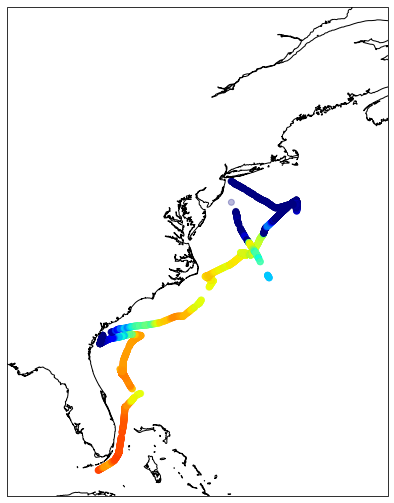

In [32]:
fig, ax = plt.subplots(figsize=(12,9), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
ax.set_ylim(23,50)
ax.set_xlim(-86,-65)

gdf.plot('Wt',vmin=15,vmax=28,cmap='jet',alpha=.1,ax=ax)

(5.0, 28.0)

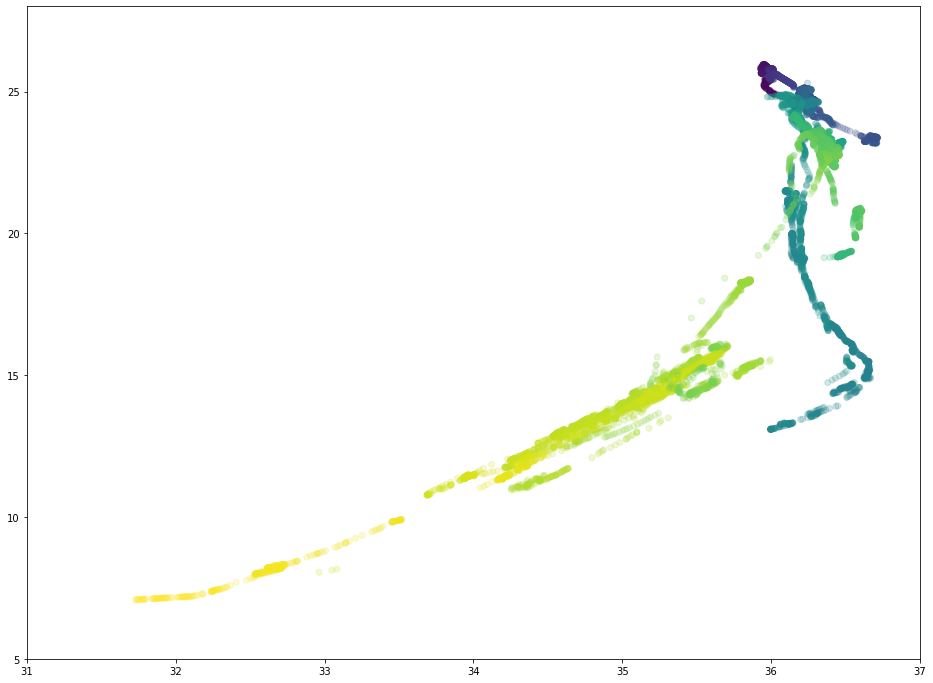

In [33]:
fig,ax = plt.subplots(figsize=(16,12))
plt.scatter(gdf.sal,gdf.Wt,c=gdf.lat,alpha=0.2)#c=df.cp_gamma,vmin=.2,vmax=1.1)
plt.xlim(31,37)
plt.ylim(5,28)

In [34]:
len(gdf),len(gdf)/10/60

(16102, 26.836666666666666)

In [ ]:
gamma_list = []
count = 0 
for i in range(len(gdf)):
    cp_spec = gdf.iloc[i][wavelengths_names]
    xopt = optimize.fmin(least_square, np.array([.1, -0.8]), args=(cp_spec, wavelengths), disp=0, maxfun=2000, maxiter=4000,xtol=0.000001,ftol=0.000001)
    gamma_list.append(xopt[1])

In [ ]:
len(gamma_list)

In [ ]:
df_tara['gamma_calc'] = gamma_list
df_tara.to_csv('data/full_tara_atlantic_gamma.csv')

# pull in the AVISO zarr dataset

In [372]:
import xarray as xr

ssh_ds = xr.open_zarr('data/aviso.zarr')
ssh_ds

<xarray.Dataset>
Dimensions:    (latitude: 72, longitude: 64, time: 713)
Coordinates:
  * latitude   (latitude) float32 26.12 26.38 26.62 26.88 ... 43.38 43.62 43.88
  * longitude  (longitude) float32 -81.88 -81.62 -81.38 ... -66.62 -66.38 -66.12
  * time       (time) datetime64[ns] 2010-04-01 2010-04-06 ... 2019-12-30
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(179, 18, 32), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(179, 18, 32), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(179, 18, 32), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(179, 18, 32), meta=np.ndarray>

In [375]:
ssh_ds_subset = ssh_ds.sel(time=slice('2012-01-01', '2012-02-20'))

In [376]:
# this is a package from https://github.com/GeoscienceAustralia/dea-notebooks that allows contours to be pulled from xarray datasets via geopanda points
from dea_spatial import subpixel_contours

from affine import Affine  


In [381]:
ssh_ds_subset.adt.load()
ssh_affine = Affine(0.25, 0.0, -81.875-.25/2, 0.0, 0.25, 26.125-.25/2)

front_gdf = subpixel_contours(ssh_ds_subset.adt, [0.25], crs='EPSG:4326', min_vertices=50, affine=ssh_affine, verbose=True)

Operating in single z-value, multiple arrays mode


In [378]:
gdf

,time,geometry
0,2012-01-01,"MULTILINESTRING ((-66.12500 37.58477, -66.3750..."
1,2012-01-06,"MULTILINESTRING ((-66.12500 37.57047, -66.3750..."
2,2012-01-11,"MULTILINESTRING ((-66.12500 37.60285, -66.3750..."
3,2012-01-16,"MULTILINESTRING ((-66.12500 37.73419, -66.3750..."
4,2012-01-21,"MULTILINESTRING ((-66.12500 37.86645, -66.1509..."
5,2012-01-26,"MULTILINESTRING ((-66.12500 37.89104, -66.3750..."
6,2012-01-31,"MULTILINESTRING ((-66.12500 37.93330, -66.3750..."
7,2012-02-05,"MULTILINESTRING ((-66.12500 38.07428, -66.3750..."
8,2012-02-10,"MULTILINESTRING ((-66.12500 38.09339, -66.3750..."
9,2012-02-15,"MULTILINESTRING ((-66.12500 38.04273, -66.3750..."


<GeoAxesSubplot:>

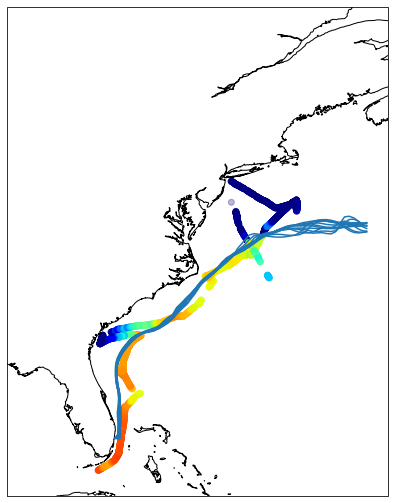

In [384]:
fig, ax = plt.subplots(figsize=(12,9), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
ax.set_ylim(23,50)
ax.set_xlim(-86,-65)

front_gdf.plot(ax=ax)


gdf.plot('Wt',vmin=15,vmax=28,cmap='jet',alpha=.1,ax=ax)

<GeoAxesSubplot:>

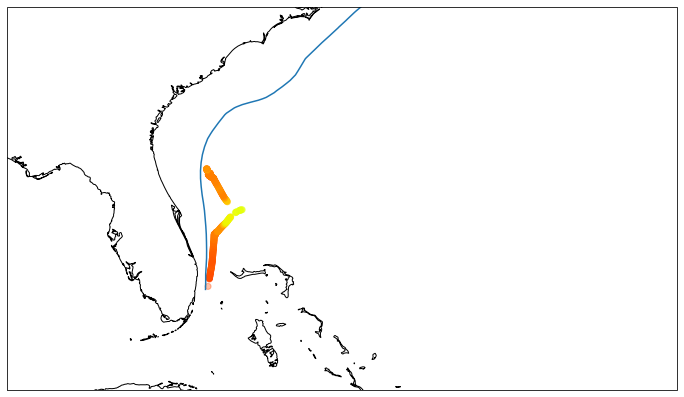

In [478]:
fig, ax = plt.subplots(figsize=(12,9), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
ax.set_ylim(23,35)
ax.set_xlim(-86,-65)

front_gdf.iloc[:1].explode().plot(ax=ax)


gdf.iloc[1100:3000].plot('Wt',vmin=15,vmax=28,cmap='jet',alpha=.1,ax=ax)

In [ ]:
# now basically find distance from the front for all of the data

# find the closes frontal line in time

# find the closest distance in space

In [468]:
import itertools
from operator import itemgetter

import geopandas as gpd
import numpy as np
import pandas as pd

from scipy.spatial import cKDTree
from shapely.geometry import Point, LineString

# gpd1 = gpd.GeoDataFrame([['John', 1, Point(1, 1)],
#                          ['Smith', 1, Point(2, 2)],
#                          ['Soap', 1, Point(0, 2)]],
#                         columns=['Name', 'ID', 'geometry'])
# gpd2 = gpd.GeoDataFrame([['Work', LineString([Point(100, 0), Point(100, 1)])],
#                          ['Shops', LineString([Point(101, 0), Point(101, 1), Point(102, 3)])],
#                          ['Home',  LineString([Point(101, 0), Point(102, 1)])]],
#                         columns=['Place', 'geometry'])


def ckdnearest(gdfA, gdfB, gdfB_cols=['time']):
    A = np.concatenate(
        [np.array(geom.coords) for geom in gdfA.geometry.to_list()])
    B = [np.array(geom.coords) for geom in gdfB.geometry.to_list()]
    B_ix = tuple(itertools.chain.from_iterable(
        [itertools.repeat(i, x) for i, x in enumerate(list(map(len, B)))]))
    B = np.concatenate(B)
#     print(np.array(B).shape)
    ckd_tree = cKDTree(B)
    dist, idx = ckd_tree.query(A, k=1)
    
    print(idx.shape)
    
    distance_signed = []
    for i in range(np.array(A).shape[0]):
        if np.array(A[i,0]) < np.array(B[idx[i],0]):
            distance_signed.append(dist[i]*-1) 
        else:
            distance_signed.append(dist[i]) 
    print(dist)
    
    
    idx = itemgetter(*idx)(B_ix)
    gdf = pd.concat(
        [gdfA,pd.Series(distance_signed, name='dist')], axis=1)
    return gdf

c = ckdnearest(gdf.iloc[:4000], front_gdf.iloc[:1].explode())

(4000,)
[2.1047926  2.10258138 2.10039531 ... 0.14853826 0.1444147  0.1438484 ]


In [470]:
len(gamma_list)

3001

In [428]:
c.dist.iloc[:1002]

0       1.939004
1       1.936934
2       1.934909
3       1.932930
4       1.930817
          ...   
997     0.166449
998     0.164481
999     0.162397
1000    0.160459
1001    0.158263
Name: dist, Length: 1002, dtype: float64

Text(0.5, 0, 'distance (km)')

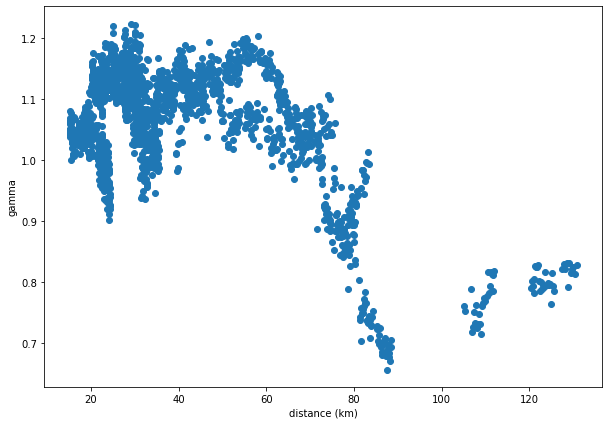

In [481]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(c.dist.iloc[1100:3001]*110,gamma_list[1100:])
ax.set_ylabel('gamma')
ax.set_xlabel('distance (km)')